In [35]:
import numpy as np
import random
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Conv2D , MaxPooling2D, SimpleRNN,GRU,LSTM,Dense, Flatten,TimeDistributed
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [36]:
class Ball_Frame:
    def __init__(self,dataset_size):
        # self.dataset_size = 5
        self.num_frames = 30
        self.frame_width = 30
        self.frame_height = 20
        self.step = 2

    def make_frame(self,label, init_x, init_y):
        frames = []
        next_y = init_y
        next_x = init_x

        for i in range(self.num_frames):

          frame = np.zeros((self.frame_height, self.frame_width))
          cv2.circle(frame, (next_y, next_x), 2, 255, -1) 

          next_x = random.randint(next_x - 2, next_x + 2)

          if label==1:
            next_y += self.step 

          else:
            next_y -= self.step

          frames.append(frame)

        return frames
    
    def generate_data(self,initial_state_x, random_num):

        if random_num < 0.5:
          label = 0
          initial_state_y = self.frame_width - 1

        else:
          label = 1
          initial_state_y = 1

        frames = self.make_frame(label, initial_state_x, initial_state_y)
        

        return frames, label

    def main(self,dataset_size):
      
      for d in range(dataset_size):
          random_num = random.random()
          initial_state_x = random.randint(2, self.frame_height - 2)

          data, label = self.generate_data(initial_state_x, random_num)

          dataset.append(data)
          labels.append(label)


In [37]:
labels = []
data = []
dataset = []

In [38]:
# Convert to np.array
ball = Ball_Frame(10)
ball.main(10)
dataset = np.array(dataset)
labels = np.array(labels)
dataset.shape, labels.shape

((10, 30, 20, 30), (10,))

In [39]:
# Reshape dataset

dataset = dataset[..., np.newaxis]
labels = labels[..., np.newaxis]

dataset.shape, labels.shape

((10, 30, 20, 30, 1), (10, 1))

In [6]:
print(len(dataset))

10


frame: 1


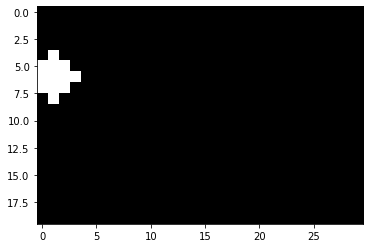



frame: 2


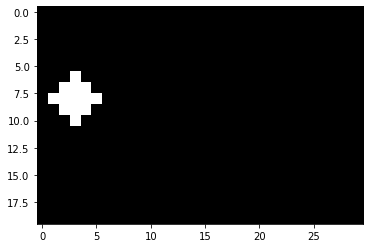



frame: 3


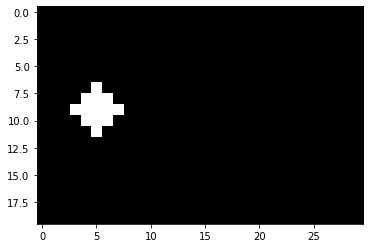



frame: 4


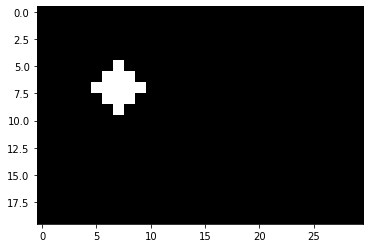



frame: 5


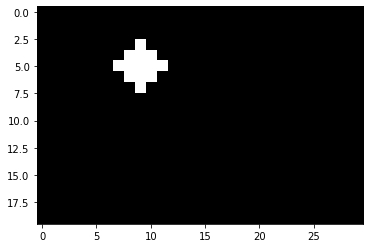



frame: 6


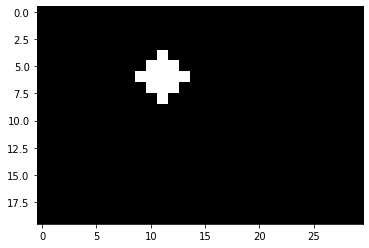



frame: 7


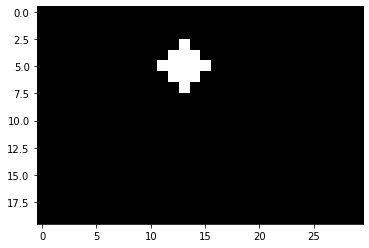



frame: 8


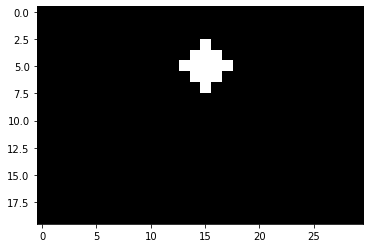



frame: 9


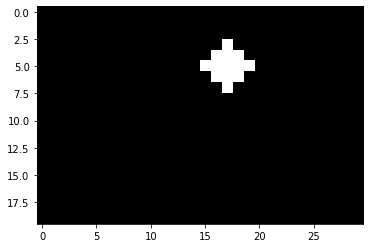



frame: 10


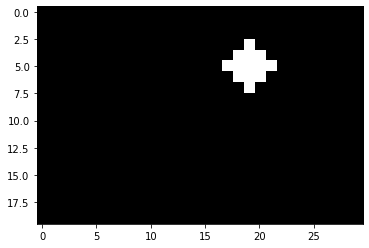



frame: 11


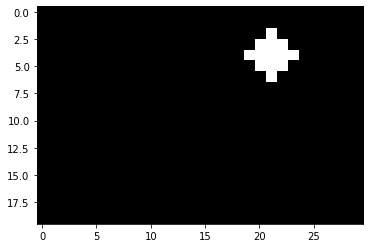



frame: 12


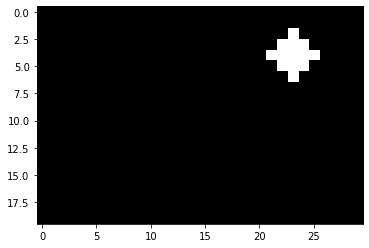



frame: 13


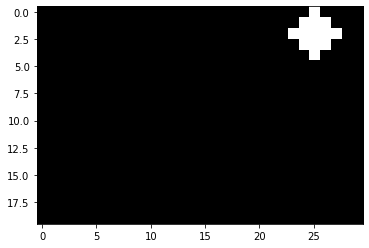



frame: 14


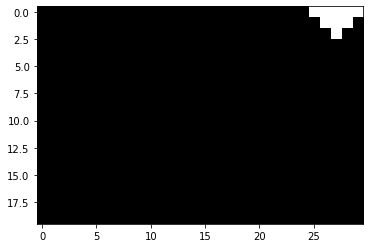



frame: 15


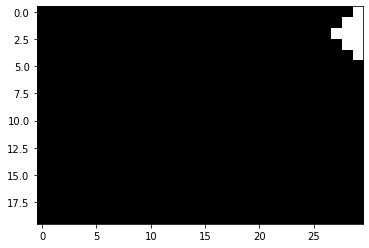



frame: 16


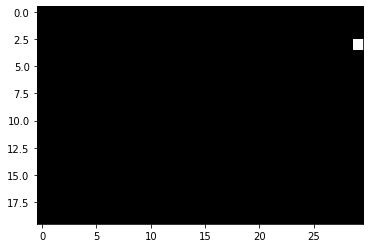



frame: 17


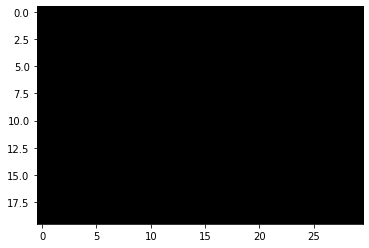



frame: 18


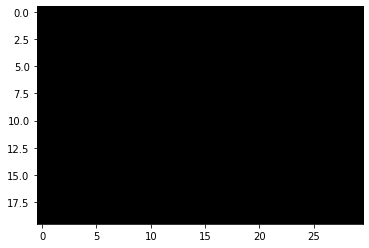



frame: 19


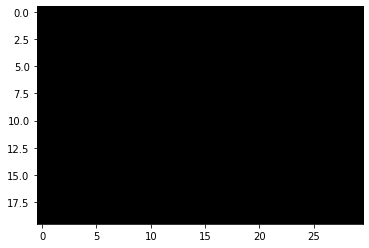



frame: 20


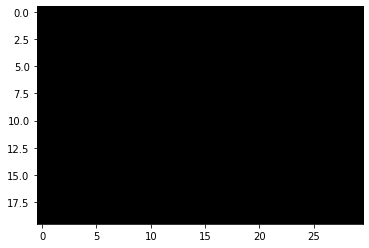



frame: 21


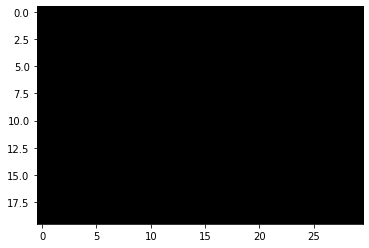



frame: 22


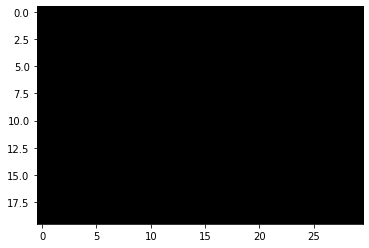



frame: 23


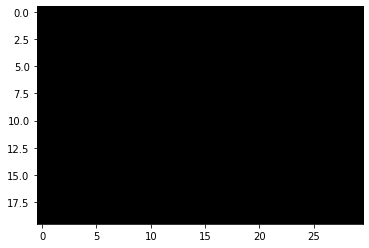



frame: 24


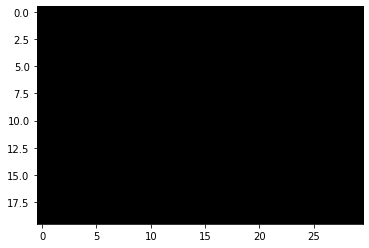



frame: 25


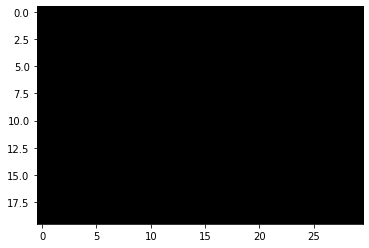



frame: 26


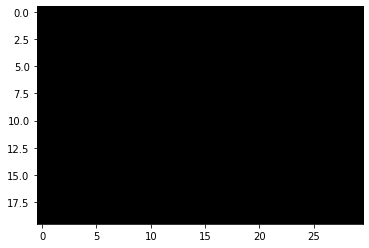



frame: 27


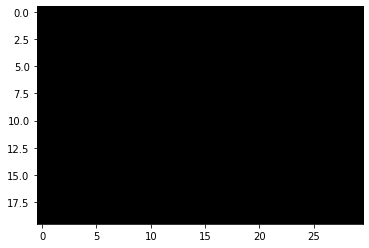



frame: 28


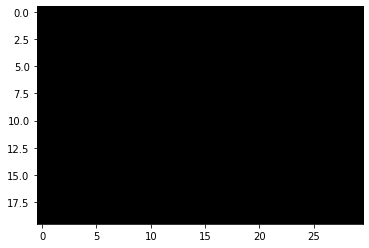



frame: 29


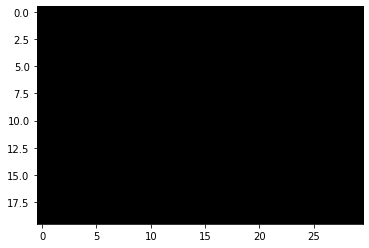



frame: 30


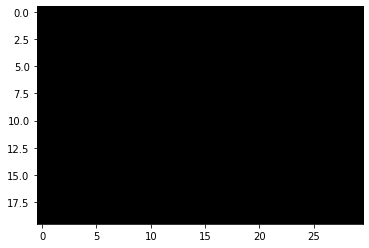

In [40]:
for frame in range(len(dataset[0, :])):
  print("frame:", frame+1)
  plt.imshow(dataset[0, frame, :, :,0], cmap='gray')
  plt.show()
  print("\n")

In [8]:
print(labels)

[[0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]]


In [41]:
dataset = []
labels = []

In [42]:
ball = Ball_Frame(1000)
ball.main(1000)
dataset =np.array(dataset)
labels =np.array(labels)
X_train = dataset[..., np.newaxis]
Y_train = labels[..., np.newaxis]
print(X_train.shape)
print(Y_train.shape)

(1000, 30, 20, 30, 1)
(1000, 1)


In [43]:
model = tf.keras.models.Sequential([
                                    #CNN
                                    TimeDistributed(Conv2D(2, (3,3), activation='relu',input_shape = (None,20,30,1))),
                                    TimeDistributed(MaxPooling2D(pool_size=(2,2))),
                                    TimeDistributed(Flatten()),
                                    #RNN
                                    GRU(20),
                                    Dense(2, activation='softmax')

])

In [44]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy'])

In [45]:
model.fit(X_train,Y_train,batch_size=32,epochs=2)

Epoch 1/2
32/32 [==============================] - 3s 12ms/step - loss: 0.6883 - accuracy: 0.5640
Epoch 2/2
32/32 [==============================] - 0s 12ms/step - loss: 0.4350 - accuracy: 0.9510


In [ ]:
model.summary()

In [46]:
dataset = []
labels = []
ball = Ball_Frame(1000)
ball.main(1000)
dataset =np.array(dataset)
labels =np.array(labels)
X_test = dataset[..., np.newaxis]
Y_test = labels[..., np.newaxis]
print(X_train.shape)
print(Y_train.shape)

(1000, 30, 20, 30, 1)
(1000, 1)


#GRU

In [47]:
model.evaluate(X_test,Y_test)

32/32 [==============================] - 1s 7ms/step - loss: 0.0837 - accuracy: 0.9770


[0.08368083834648132, 0.9769999980926514]

#LSTM

In [26]:
model.evaluate(X_test,Y_test)

32/32 [==============================] - 1s 7ms/step - loss: 0.0987 - accuracy: 0.9760


[0.09865789115428925, 0.9760000109672546]

#simple RNN

In [22]:
model.evaluate(X_test,Y_test)

32/32 [==============================] - 1s 8ms/step - loss: 0.1500 - accuracy: 0.9650


[0.14995931088924408, 0.9649999737739563]